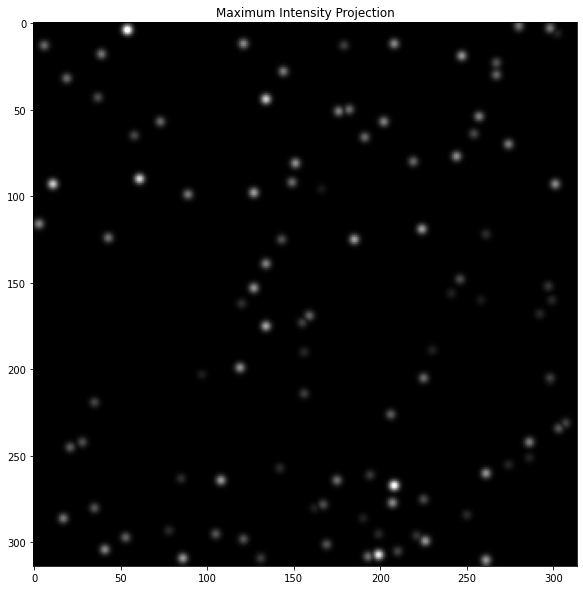

In [8]:
## -------------------------------------- ##
## ---- Generate reference particles ---- ##
## -------------------------------------- ##

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from random import randint, uniform
import tifffile as tf
import pandas as pd

# Define function to generate particles
def generate_synthetic_beads(dimensions=(314, 314, 44), bead_diameter=3, num_beads=50):
    
    # Initialize arrays to store data
    stack = np.zeros(dimensions)
    positions = []

    # Calculate the radius
    radius = bead_diameter // 2
    
    # Generate random positions and intensities for the beads
    for _ in range(num_beads):
        x = randint(radius, dimensions[0] - radius - 1)
        y = randint(radius, dimensions[1] - radius - 1)
        z = randint(0, dimensions[2] - 1)
        intensity = uniform(700000, 5000000)  # Random intensity in the defined range
        positions.append([x, y, z, intensity])
        
        # Draw the bead with the random intensity
        for i in range(-radius, radius + 1):
            for j in range(-radius, radius + 1):
                if i**2 + j**2 <= radius**2:
                    stack[x + i, y + j, z] = intensity
    
    # Apply Gaussian filter to smooth the beads
    stack = gaussian_filter(stack, sigma=2)
    
    return stack, positions

# Define Parameters
dimensions = (314, 314, 44) # Image dimensions (X,Y,Z)
bead_diameter = 1 # Bead diameter (1 pixel for sub-diffraction)
num_beads = 100 # Number of beads

# Generate synthetic beads stack
synthetic_stack, bead_positions = generate_synthetic_beads(dimensions, bead_diameter, num_beads)

# Calculate the Maximum Intensity Projection
mip = np.max(synthetic_stack, axis=2)

# Visualize the Maximum Intensity Projection
plt.figure(figsize=(10, 10))
plt.imshow(mip, cmap='gray', vmin=0, vmax=np.mean(mip)*100)
plt.title('Maximum Intensity Projection')
#plt.colorbar(label='Intensity')
plt.show()

# Save the stack as a TIFF file with correct shape
output_path = '*/beads_stack_with_random_intensities.tif'

# Transpose the array to shape (num_slices, height, width) and write to TIFF
synthetic_stack_transposed = np.transpose(synthetic_stack, (2, 0, 1))
tf.imwrite(output_path, synthetic_stack_transposed.astype(np.float32), imagej=True)

# Save the bead positions to a CSV file
positions_df = pd.DataFrame(bead_positions, columns=['X', 'Y', 'Z', 'Intensity'])
positions_output_path = '*/bead_positions_high.csv'
positions_df.to_csv(positions_output_path, index=False)


In [ ]:
## ------------------------------------------------ ##
## ---- Add reference particles to input image ---- ##
## ------------------------------------------------ ##

# Define directories (adjust acordingly)
tiff_file1 = '*/input.tif'
tiff_file2 = '*/beads_stack.tif'

# Load TIFF files
image1 = tifffile.imread(tiff_file1)
image2 = tifffile.imread(tiff_file2)

# Perform addition (assuming images have the same shape)
result_image = image1 + image2

# Replace with the path where you want to save the resulting TIFF file
output_tiff_file = '*/input_with_beads.tif'

# Save the result as TIFF
tifffile.imwrite(output_tiff_file, result_image)
